In [83]:
import os
import datetime
import time
import requests
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [9]:
!pip install xgboost --q

In [32]:
!pip install catboost --q

In [25]:
!pip install ipywidgets --q

In [27]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [34]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [84]:
X = pd.read_csv("data/dataset.csv")

In [85]:
X.sample(3)

,city_name,date,pm2_5,pm_2_5-1,pm_2_5-2,pm_2_5-3,pm_2_5-4,pm_2_5-5,mean_7_days,mean_14_days,...,cos_day_of_week,temperature_max,temperature_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_max,wind_gusts_max,wind_direction_dominant
27342,Paris,2015-01-08,9.0,19.0,21.0,25.0,12.0,18.0,26.285714,22.357143,...,-0.900969,10.2,4.9,3.7,3.7,0.0,5.0,33.5,70.9,232
112270,Seattle - Bellevue-SE 12th St,2020-07-29,5.3,5.1,5.9,5.0,3.6,3.2,3.900000,3.778571,...,-0.222521,28.2,16.2,0.0,0.0,0.0,0.0,6.9,19.1,304
80743,Albuquerque,2018-08-09,6.7,7.4,5.4,6.9,6.2,6.6,7.114286,7.114286,...,-0.900969,35.5,20.6,0.0,0.0,0.0,0.0,26.0,37.4,150


In [86]:
# Create OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder to the data
encoder.fit(X[['city_name']])

# Transform the data
onehot = encoder.transform(X[['city_name']])

# Convert the output to a dense array and concatenate with the original data
X = pd.concat([X, pd.DataFrame(onehot.todense())], axis=1)

X = X.drop(columns=['date', 'city_name'])
X.columns = X.columns.astype(str)

y = X.pop('pm2_5')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

MSE: 30.542052085914236
MAE: 2.744236221754168
R squared: 0.7367012573980776


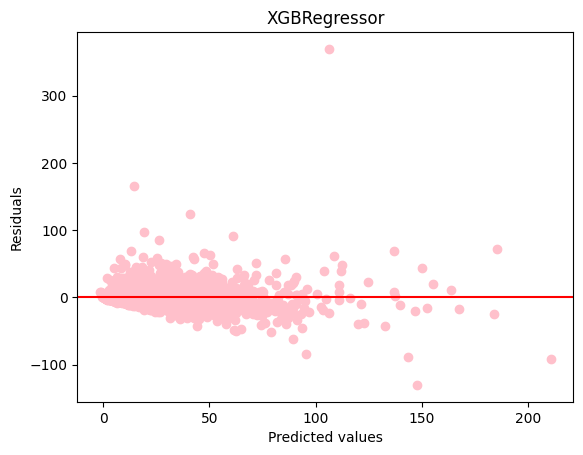

Took 13.58 sec.



In [99]:
start_of_cell = time.time()

xgb_regressor = XGBRegressor()

xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

# calculate MSE using sklearn
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# calculate MAE using sklearn
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# calculate R squared using sklearn
r2 = r2_score(y_test, y_pred)
print("R squared:", r2)

# plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, c="pink")
plt.axhline(y=0, color="r", linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title("XGBRegressor")
plt.show()

end_of_cell = time.time()
print(f"Took {round(end_of_cell - start_of_cell, 2)} sec.\n")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

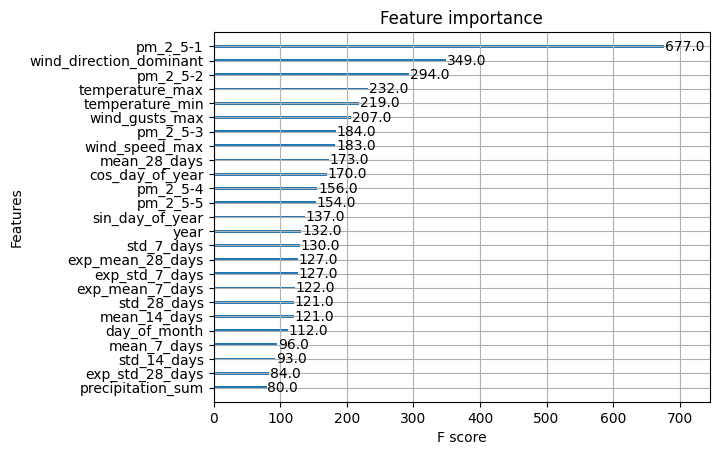

In [110]:
from xgboost import plot_importance

plot_importance(xgb_regressor, max_num_features=25)

In [113]:
import pickle 


# save model to pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_regressor, f)

In [ ]:
# # retrieve model from pickle
# with open('model.pkl', 'rb') as f:
#     model = pickle.load(f)

In [114]:
with open('onehotencoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)